<h1><center>Project MAA106: approximation of periodic functions</center></h1>

<h2><center> Authors: Dain Jung & Vrushank Agrawal (Group 3) </centr></h2>

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import math
import numpy as np
import scipy
from scipy import integrate

<h2> Section 1: Fourier Series </h2>

<h3>1.1 Background </h3>
Given a 2$\pi$-periodic function f: $\mathbb{R} \rightarrow \mathbb{R}$, its Fourier series S(f) is defined by 

**$$ S(f)(x) = a_0 (f) + 2\sum_{n=1}^{\infty} (a_n(f)cos(nx) + b_n(f)sin(nx)) $$**

where the Fourier coefficients $a_n(f)$ and $b_n(f)$ are given by 

**$$ a_n(f) = \frac{1}{2\pi} \int_{-\pi}^{\pi} f(x)cos(nx) \,dx \\, \\ b_n(f) = \frac{1}{2\pi} \int_{-\pi}^{\pi} f(x)sin(nx) \, dx $$**

<h3> 1.2 Observations </h3>

<h4> 1.2.1 </h4>

The function f and g described in the assignement are both even functions, hence it is straightforward to conclude that $b_n(f) = b_n(g) = 0$, while $$a_n(g) = \frac{1}{\pi} \int_{0}^{\pi} g(x)cos(nx) \,dx \\ a_n(f) = \frac{1}{\pi} \int_{0}^{\pi} f(x)cos(nx) \,dx$$

In [4]:
def f1():
    return 1

def f2():
    return -1

def g(x):
    return 1 - (2*x/math.pi)

def a_n_f(n):
    return integrate.quad(f1() * np.cos(n*x), 0, math.pi/2) + integrate.quad(f2() * np.cos(n*x), math.pi/2, math.pi)

def a_n_g(n):
    return integrate.quad(g(x)*np.cos(n*x), 0, math.pi)

def Sum_f(n, x):
    sum_f = a_n_f(0)
    for i in range(1, n):
        sum += 2*a_n_f(n)*np.cos(n*x)
    return sum_f

def Sum_g(n, x):
    sum_g = a_n_g(0)
    for i in range(1,n):
        sum += 2*a_n_g(n)*np.cos(n*x)
    return sum_g


def Sn_even():
    poly_sum = a_n_f(0)

* Above is a Python code that evaluates the truncated fourier series of an even 2$\pi$-periodic function.

<h4> 1.2.3 </h4>
As suggested, we will study the decay of Fourier coefficients of functions with different regularity, and the error between the functions and their tranccated Fourier series. 

Here, we will study the functions $f_1: x \rightarrow x^2$ , $f_2: x \rightarrow cos(x)$, and $f_3: x \rightarrow {sin(x)}^2$ on the interval $I = [-1,1]$. It is worth noting that $f_1 and f_2$ are even functions while $f_3$ is an odd function. Hence $b_n(f_1) = b_n(f_2) = a_n(f_3) = 0$, while $a_n(f)$ for $f_1$, $f_2$, and $b_n(f)$ for $f_3$ is goven by:

$$a_n(f) = \frac{1}{\pi} \int_{0}^{\pi} f(x)cos(nx) \,dx $$ 
$$b_n(f) = \frac{1}{\pi} \int_{0}^{\pi} f(x)sin(nx) \,dx $$ 

Moreover, the trunacated Fourier series for functions $f_1$, $f_2$,  and $f_3$ is respectively given by the trigonometric polynomial: $$ S_N^{even}(f)(x) = a_0(f) + 2\sum_{n=1}^{N-1} a_n(f)cos(nx) $$

$$ S_N^{odd}(f)(x) = b_0(f) + 2\sum_{n=1}^{N-1} b_n(f)sin(nx) $$

Below, we define the functions as f1 and f2 respectively and first analyze the decay of their Fourier coefficients.

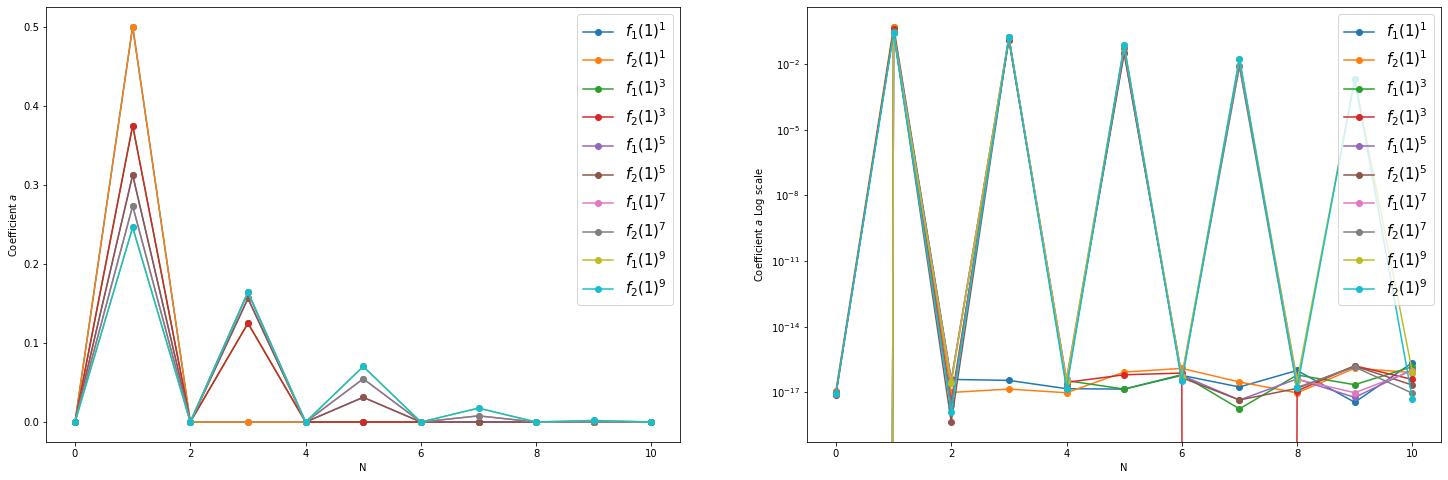

In [5]:
def f1(x, pow = 1):
    return np.sin(x) ** pow

def f2(x, pow = 1):
    return np.cos(x) ** pow

def a(f, n, pow = 1):                                                          #calculates a single coefficient
    func = lambda x : f(x, pow) * np.cos(n * x)
    return integrate.quad(func, 0, math.pi)

def b(f, n, pow = 1):                                                          #calculates a single coefficient
    func = lambda x : f(x, pow) * np.sin(n * x)
    return integrate.quad(func, 0, math.pi)

def Fourier_coeff_even(f, pow = 1):                                            #calculates fourier coefficients upto N
    coeff, err = np.zeros(11), np.zeros(11)
    for i in range(11):
        coeff[i], err[i] = a(f, i, pow)
    return np.abs(coeff / math.pi), err

def Fourier_coeff_odd(f, pow = 1):                                             #calculates fourier coefficients upto N
    coeff, err = np.zeros(11), np.zeros(11)
    for i in range(11):
        coeff[i], err[i] = b(f, i, pow)
    return np.abs(coeff / math.pi), err

coeff_odd = [[] for i in range(5)]
coeff_even = [[] for i in range(5)]

tabk = np.arange(0,11,1)
for i in range(5):
    coeff_odd[i], temp = Fourier_coeff_odd(f1, (2*i +1))
    coeff_even[i], temp = Fourier_coeff_even(f2, (2*i +1))

plt.figure(figsize=(25, 8))
plt.subplot(1,2,1)
for i in range(5):
    plt.plot( tabk, coeff_odd[i], marker='o', label= f'$f_1(1)^{2*i + 1}$')
    plt.plot( tabk, coeff_even[i], marker='o', label= f'$f_2(1)^{2*i + 1}$')
plt.xlabel('N')
plt.ylabel('Coefficient $a$')
plt.legend(fontsize=15, loc='upper right')
plt.subplot(1,2,2)
for i in range(5):
    plt.plot( tabk, coeff_odd[i], marker='o', label= f'$f_1(1)^{2*i + 1}$')
    plt.plot( tabk, coeff_even[i], marker='o', label= f'$f_2(1)^{2*i + 1}$')
plt.xlabel('N')
plt.yscale('log')
plt.ylabel('Coefficient $a$ Log scale')
plt.legend(fontsize=15)
plt.show()

In the functions above, we have calculated the Fourier coefficients from $a_0$ to $a_9$, and as we can observe, the coefficients decay to zero extremely fast for the functions. This observation is also consistent with the remark that smoother the function is, faster is the decay of its Fourier coefficients.

Now, let us study the error between the function and its truncated Fourier series in the next cell.

Text(0.5, 1.0, 'Fourier Series vs N')

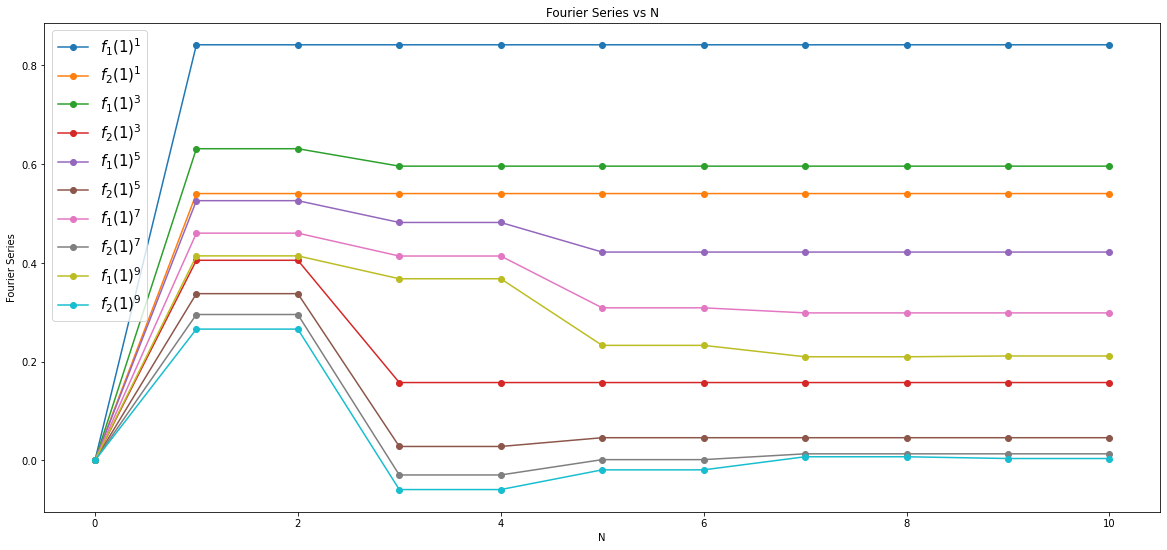

In [6]:
def Sn_odd(f, x, pow = 1):
    partial_sum = np.zeros(11)
    partial_sum[0] = 0
    for i in range(1, 11, 1):
        partial_sum[i] = partial_sum[i-1] + 2 * b(f, i, pow)[0] * np.sin(i * x)
    return partial_sum / math.pi
    
def Sn_even(f, x, pow = 1):
    partial_sum = np.zeros(11)
    partial_sum[0] = a(f, 0, pow)[0]
    for i in range(1, 11, 1):
        partial_sum[i] = partial_sum[i-1] + 2 * a(f, i, pow)[0] * np.cos(i * x)
    return partial_sum / math.pi

partial_sum_f1 = [[] for i in range(5)]
partial_sum_f2 = [[] for i in range(5)]
err_f1 = [[] for i in range(5)]
err_f2 = [[] for i in range(5)]

for i in range(5):
    partial_sum_f1[i] = Sn_odd(f1, 1, 2*i + 1)
    partial_sum_f2[i] = Sn_even(f2, 1, 2*i + 1)
    f1_val = f1(1, 2*i + 1)
    f2_val = f2(1, 2*i + 1)
    err_f1[i] = [ np.abs(j - f1_val) for j in partial_sum_f1[i]]
    err_f2[i] = [ np.abs(j - f2_val) for j in partial_sum_f2[i]]

tabk = np.arange(0, len(partial_sum_f2[0]))

plt.figure(figsize=(20, 9))
for i in range(5):
    plt.plot( tabk, partial_sum_f1[i], marker='o', label= f'$f_1(1)^{2*i + 1}$')
    plt.plot( tabk, partial_sum_f2[i], marker='o', label= f'$f_2(1)^{2*i + 1}$')
plt.xlabel('N')
plt.ylabel('Fourier Series')
plt.legend(fontsize=15, loc='upper left')
plt.title('Fourier Series vs N')

Plotted above is the graph of the Fourier Series for the functions sin(x) and cos(x) for powers 1, 3, 5, 7, and 9. In the next cell we will plot the error between these Fourier series and the values of the functions. 

Text(0.5, 1.0, 'Error for Fourier Series vs N')

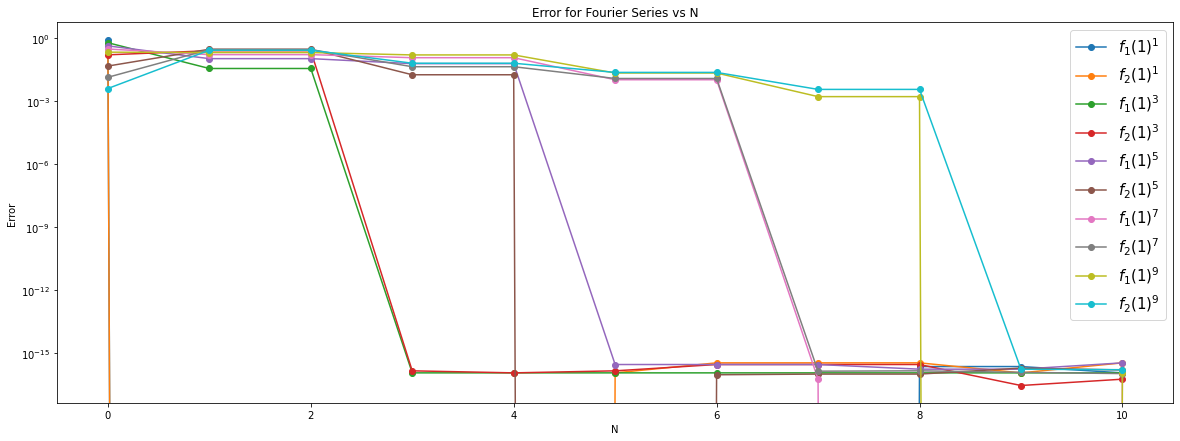

In [7]:
plt.figure(figsize=(20, 7))
for i in range(5):
    plt.plot( tabk, err_f1[i], marker='o', label= f'$f_1(1)^{2*i + 1}$')
    plt.plot( tabk, err_f2[i], marker='o', label= f'$f_2(1)^{2*i + 1}$')

plt.xlabel('N')
plt.ylabel('Error')
plt.yscale('log')
plt.legend(fontsize=15, loc='upper right')
plt.title('Error for Fourier Series vs N')

In the graph plotted above, we can observe that the error of the functions with smaller powers decreases faster than the error for the functions with higher powers. Essentialy, there is a clear relation between the error of the truncated Fourier Series and the exponential power of the functions.

Now, let us see if there is any correlation between the decay of the Fourier coefficients and the error in the truncated Fourier Series of the respective functions.

Text(0.5, 1.0, 'Error for Fourier Series vs N')

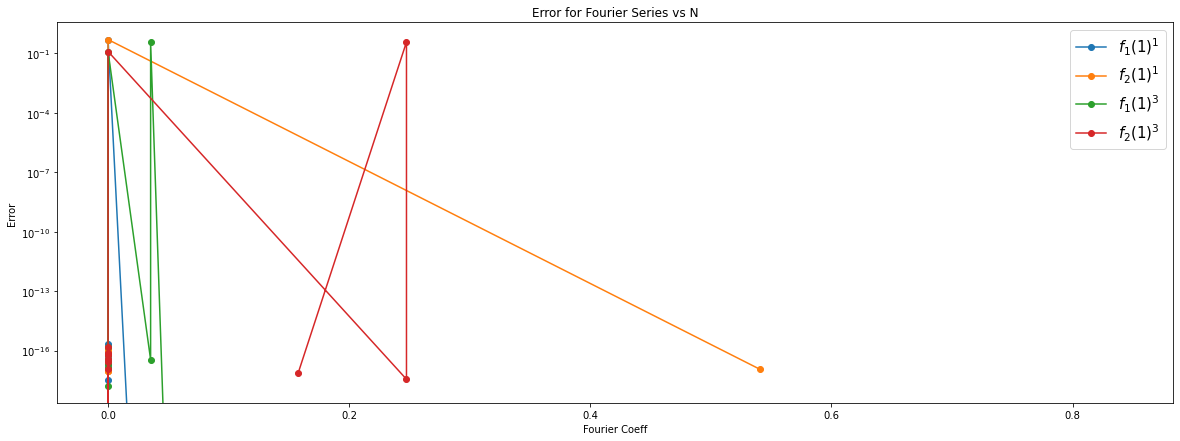

In [8]:
plt.figure(figsize=(20, 7))
for i in range(2):
    plt.plot( err_f1[i], coeff_odd[i], marker='o', label= f'$f_1(1)^{2*i + 1}$')
    plt.plot( err_f2[i], coeff_even[i], marker='o', label= f'$f_2(1)^{2*i + 1}$')
plt.xlabel('Fourier Coeff')
plt.ylabel('Error')
plt.yscale('log')
plt.legend(fontsize=15, loc='upper right')
plt.title('Error for Fourier Series vs N')

Something to be done here regarding the relations.

<h2> 2.1 Background </h4>

We denote the unique trigonometric polynomial of degree N-1 of a 2$\pi$ periodic and even function $f$ by: $$P_N(f)(x) = \hat{f_0} + 2 \sum_{n = 1}^{N-1} \hat{f_n}cos(nx) $$

where we fix some integer $N > 0$ and define $X_k$ as:  $$X_k = \frac {2k + 1}{2N} \pi, \quad k = 0,..., N-1$$

such that $$ P_N(f)(X_k) = f(X_k) \quad \forall k = 0,...,N-1. $$

We also define the following notations, where $\hat{f} \in \mathbb{R}^N $ is the vector of coefficients of $P_N(f)$, and $ f(X) \in \mathbb{R}^N $ is the vector of values of $f$ at the points $X_k$ :
$$ 
\hat{f} = \begin{pmatrix} \hat{f_0} \\ . \\ . \\ . \\ \hat{f_{N-1}} \end{pmatrix} \quad \textrm{and} \quad f(X) = \begin{pmatrix} f(X_0) \\ . \\ . \\ . \\ f(X_{N-1}) \end{pmatrix}
$$

We will use this information to study the subsections mentioned hereafter.

<h2> 2.2 Observations </h2>

We have to find the coefficients of the polynomial $P_N(f)$ in the form of vector $\hat{f}$. We have been given three different methods to do that and in the next three subsections of 2.2, we will evaluate $\hat{f}$ for a function $(f)$ using the three different methods. Thereafter, we will evaluate the performance of the three methods using the function %timeit.

<h3> 2.2.1 </h3>

As suggested, we write the problem of finding $\hat{f}$ as a linear system given by $A\hat{f} = f(X)$ where $A$ is a $N \times N$ matrix to be determined. 

For our analysis, we will consider $cos(X)$ and its exponents as our 2$\pi$-periodic even functions.

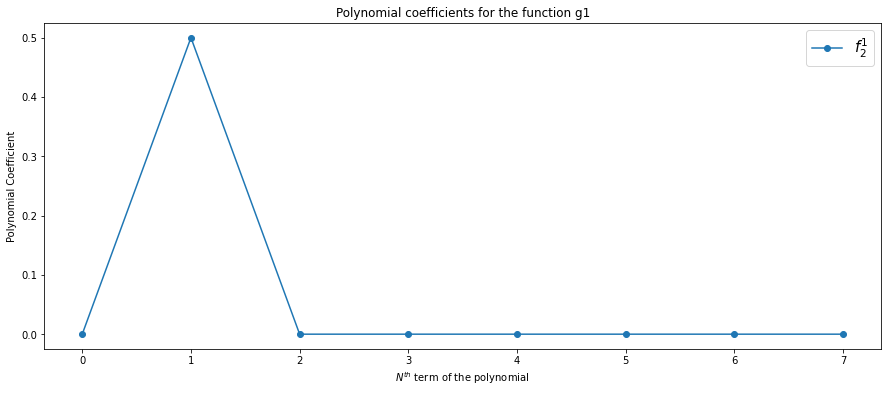

In [101]:
N = 8                           # size of the matrix


def cos(x):
    return np.cos(x)


def g1(x, pow = 1):
    return (np.abs(x ** 3) % (2 * np.pi)) ** pow

A = [[] for j in range(N)]                                          # initializing matrix A
fX_vals = [ f2 ( (X_k(j, N) ) ) for j in range(N)]                  # intitializing vector f(X_k)

# print(fX_vals[i])


# function to return the value X_k

def X_k(k, N):                                                      
    return (2*k + 1) / (2*N) * np.pi


for j in range(N):

    # determining the matrix A
    A[j] = [ 1 if k == 0 else ( 2 * cos( (k * X_k(j, N)) ) ) for k in range(N) ]
    
    # print(A[j])


f_hat = scipy.linalg.solve(A, fX_vals)                               # initializing polynomial coefficients for several functions

# debugging function to check validity of the matrix A

# vals = np.dot( np.linalg.inv(A), fX_vals )                                

# print(vals)
# print(fX_vals)

tabk = np.arange(0, N)

plt.figure(figsize=( 15, 6))
plt.plot( tabk, f_hat, marker = 'o', label=f'$f_{2}^{2*i + 1}$')
plt.legend(fontsize='15', loc='upper right')
plt.title(f'Polynomial coefficients for the function g1')
plt.yscale('linear')
plt.xlabel('$N^{th}$ term of the polynomial')
plt.ylabel('Polynomial Coefficient')
plt.show()

After plotting the vector $\hat{f}$ (coefficients of the approximated trigonometric polynomial) for all functions, we can observe that the magnitude of the coefficients slowly decays to zero as expected. Though, the rate at which the coefficients decay, depends on the function whose trigonometric polynomial we are approximating. We can confirm that these coefficients are appropriate by evaluating the equation $$ P_N(f)(X_k) = f(X_k) \quad , \forall k = 0, ..., N-1 $$

where $ P_N(f)(X_k) = \textrm{A[k]} \cdot \hat{f} \quad \forall k = 0, ..., N-1 $ and A\[k\] = \[1, 2 \* cos(1 \* k), ..., 2 \* cos((N-1) \* k)\]

<h4> 2.2.2 </h4>

It is also claimed that the inverse of matrix A is given by the matrix:
$$ 
B = \frac {1}{N} 
\begin{pmatrix}
    cos(0X_0) & \cdots & cos(0X_{N-1}) \\
    \vdots & \ddots & \vdots \\
    cos((N-1)X_0) & \cdots & cos((N-1)X_{N-1}) \\
\end{pmatrix}
$$

We can use this information to compute the coefficients of the polynomial $P_N(f)$ in a more efficient way and let's prove it:
$$ A \cdot \hat{f} = f(X_k) \quad ,$$ 
$$A^{-1}\cdot A \cdot \hat{f} = A^{-1} \cdot f(X_k) \quad ,$$
$$\hat{f} = B \cdot f(X_k)$$

Now, computing the product of a matrix with a vector is an operation of the order $N^2$, while computing the solution from a linear equation is an operation that can best be achieved by the order of $N^{\log_2 7}$. Hence, using the second method by employing the matrix B, we can approximate the polynomial for the function in a faster way. Let us implement this technique and observe the results.

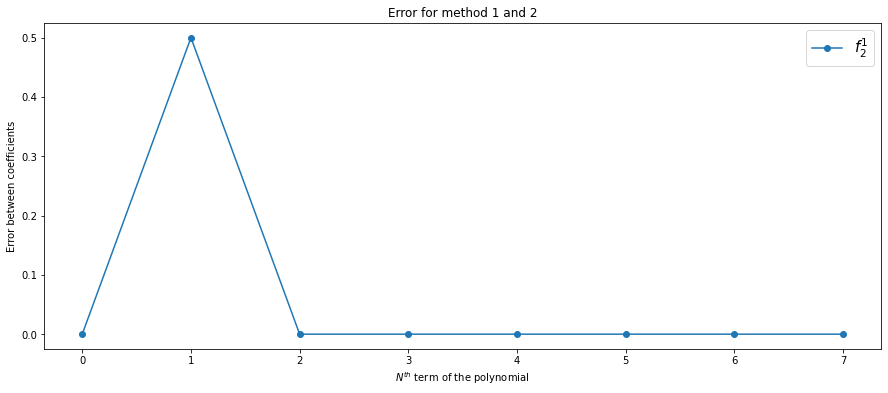

In [103]:
B = [[] for i in range(N)]                             # initializing matrix B

for j in range(N):
    B[j] = [ cos( (j * X_k(k, N)) ) / N for k in range(N) ]

    # print(B[j])

# debugging function to check A . B is the Identity matrix

# I_n = np.dot( B, A )

# print(I_n)


f_hat_B = np.dot(B, fX_vals)


# debugging function to check validity of the the matrix B

# vals = np.dot(B, fX_vals)                               

# print(vals)
# print(f_hat_B)


tabk = np.arange(0, N)

plt.figure(figsize=( 15, 6))
plt.plot( tabk, f_hat_B, marker = 'o', label=f'$f_{2}^{2*i + 1}$')
plt.legend(fontsize='15', loc='upper right')
plt.title(f'Error for method 1 and 2')
plt.yscale('linear')
plt.xlabel('$N^{th}$ term of the polynomial')
plt.ylabel('Error between coefficients')
plt.show()

<h3> 2.2.3 </h3>

Here we will use the Discrete Cosine Transform (DCT) and the inverse Discrete Cosine Transform (DCT) to find the coefficients $\hat{f}$ of the polynomial $P_N(f)$.

<h2> 3.1 Solving Differential Equations </h2>

The poisson equation is given by: 
$$ -u^"(x) = f(x) \quad x \in (0, \pi) u^'(0) = u^'(\pi) = 0 $$

<h2> 3.2 Back to Polynomial Interpolation </h2> 

Given a function $$F(x) = \textrm{tanh}(20 \textrm{sin}(15x)) + 0.02e^{3x}\textrm{sin}(300x)$$
we need to reconstruct the Polynomial on the interval $I = [-1, 1]$ from many sample points of $F(x_k)$.

<h2> 3.3 Nonlinear Operations </h2>

